In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [45]:
df = pd.read_csv("sales.csv")
df

,Order ID,Customer Name,Category,Sub Category,City,Order Date,Region,Sales,Discount,Profit,State
0,OD1,Harish,Oil & Masala,Masalas,Vellore,11-08-2017,North,1254,0.12,401.28,Tamil Nadu
1,OD2,Sudha,Beverages,Health Drinks,Krishnagiri,11-08-2017,South,749,0.18,149.80,Tamil Nadu
2,OD3,Hussain,Food Grains,Atta & Flour,Perambalur,06-12-2017,West,2360,0.21,165.20,Tamil Nadu
3,OD4,Jackson,Fruits & Veggies,Fresh Vegetables,Dharmapuri,10-11-2016,South,896,0.25,89.60,Tamil Nadu
4,OD5,Ridhesh,Food Grains,Organic Staples,Ooty,10-11-2016,South,2355,0.26,918.45,Tamil Nadu
...,...,...,...,...,...,...,...,...,...,...,...
9989,OD9990,Sudeep,"Eggs, Meat & Fish",Eggs,Madurai,12/24/2015,West,945,0.16,359.10,Tamil Nadu
9990,OD9991,Alan,Bakery,Biscuits,Kanyakumari,07-12-2015,West,1195,0.26,71.70,Tamil Nadu
9991,OD9992,Ravi,Food Grains,Rice,Bodi,06-06-2017,West,1567,0.16,501.44,Tamil Nadu
9992,OD9993,Peer,Oil & Masala,Spices,Pudukottai,10/16/2018,West,1659,0.15,597.24,Tamil Nadu


Data Cleaning

In [46]:
# Drop customer name for data privacy
df = df.drop(columns = ["Customer Name","State"])

In [48]:
# Check data types for certain columns
print(df["Sales"].dtype)
print(df["Discount"].dtype)
print(df["Profit"].dtype)

int64
float64
float64


In [49]:
# Update dates to consistent format
df["Order Date"] = df["Order Date"].str.replace("-","/")
df

,Order ID,Category,Sub Category,City,Order Date,Region,Sales,Discount,Profit
0,OD1,Oil & Masala,Masalas,Vellore,11/08/2017,North,1254,0.12,401.28
1,OD2,Beverages,Health Drinks,Krishnagiri,11/08/2017,South,749,0.18,149.80
2,OD3,Food Grains,Atta & Flour,Perambalur,06/12/2017,West,2360,0.21,165.20
3,OD4,Fruits & Veggies,Fresh Vegetables,Dharmapuri,10/11/2016,South,896,0.25,89.60
4,OD5,Food Grains,Organic Staples,Ooty,10/11/2016,South,2355,0.26,918.45
...,...,...,...,...,...,...,...,...,...
9989,OD9990,"Eggs, Meat & Fish",Eggs,Madurai,12/24/2015,West,945,0.16,359.10
9990,OD9991,Bakery,Biscuits,Kanyakumari,07/12/2015,West,1195,0.26,71.70
9991,OD9992,Food Grains,Rice,Bodi,06/06/2017,West,1567,0.16,501.44
9992,OD9993,Oil & Masala,Spices,Pudukottai,10/16/2018,West,1659,0.15,597.24


In [64]:
# Split the date column
date = df["Order Date"]
day = []
month = []
year = []

for i in date:
    value = i.split("/")
    month.append(int(value[0]))
    day.append(int(value[1]))
    year.append(int(value[2]))
df["Day"] = day
df["Month"] = month
df["Year"] = year

In [65]:
# Rearrange columns
column_index = ["Order ID","Category","Sub Category","City","Region","Order Date","Day","Month","Year","Sales","Discount","Profit"]
df.reindex(columns=column_index)

,Order ID,Category,Sub Category,City,Region,Order Date,Day,Month,Year,Sales,Discount,Profit
0,OD1,Oil & Masala,Masalas,Vellore,North,11/08/2017,8,11,2017,1254,0.12,401.28
1,OD2,Beverages,Health Drinks,Krishnagiri,South,11/08/2017,8,11,2017,749,0.18,149.80
2,OD3,Food Grains,Atta & Flour,Perambalur,West,06/12/2017,12,6,2017,2360,0.21,165.20
3,OD4,Fruits & Veggies,Fresh Vegetables,Dharmapuri,South,10/11/2016,11,10,2016,896,0.25,89.60
4,OD5,Food Grains,Organic Staples,Ooty,South,10/11/2016,11,10,2016,2355,0.26,918.45
...,...,...,...,...,...,...,...,...,...,...,...,...
9989,OD9990,"Eggs, Meat & Fish",Eggs,Madurai,West,12/24/2015,24,12,2015,945,0.16,359.10
9990,OD9991,Bakery,Biscuits,Kanyakumari,West,07/12/2015,12,7,2015,1195,0.26,71.70
9991,OD9992,Food Grains,Rice,Bodi,West,06/06/2017,6,6,2017,1567,0.16,501.44
9992,OD9993,Oil & Masala,Spices,Pudukottai,West,10/16/2018,16,10,2018,1659,0.15,597.24


Data Analysis

In [66]:
# Finding out which category made the most sales
df.groupby(["Category"]).Sales.sum()

Category
Bakery               2112281
Beverages            2085313
Eggs, Meat & Fish    2267401
Food Grains          2115272
Fruits & Veggies     2100727
Oil & Masala         2038442
Snacks               2237546
Name: Sales, dtype: int64

In [67]:
df.groupby(["Sub Category"]).Sales.sum()

Sub Category
Atta & Flour           534649
Biscuits               684083
Breads & Buns          742586
Cakes                  685612
Chicken                520497
Chocolates             733898
Cookies                768213
Dals & Pulses          523371
Edible Oil & Ghee      668086
Eggs                   575156
Fish                   560548
Fresh Fruits           551212
Fresh Vegetables       525842
Health Drinks         1051439
Masalas                697480
Mutton                 611200
Noodles                735435
Organic Fruits         503402
Organic Staples        558929
Organic Vegetables     520271
Rice                   498323
Soft Drinks           1033874
Spices                 672876
Name: Sales, dtype: int64

In [68]:
# Finding out which region made the most sales for a specific category
df.groupby(["Category","Region"]).Sales.sum()

Category           Region 
Bakery             Central    448343
                   East       588241
                   South      361385
                   West       714312
Beverages          Central    501194
                   East       577206
                   South      344666
                   West       662247
Eggs, Meat & Fish  Central    516642
                   East       677830
                   South      360963
                   West       711966
Food Grains        Central    463683
                   East       598868
                   South      353069
                   West       699652
Fruits & Veggies   Central    526507
                   East       564237
                   South      352162
                   West       657821
Oil & Masala       Central    453293
                   East       622071
                   North        1254
                   South      298859
                   West       662965
Snacks             Central    558494
           

In [69]:
# Find out which year the company made the most profits
df.groupby("Year").Profit.sum()

Year
2015     752529.11
2016     797192.99
2017     953216.22
2018    1244182.88
Name: Profit, dtype: float64

In [70]:
# Find out during which year a specific city made the most sales
df.groupby(["City","Year"]).Sales.sum()

City          Year
Bodi          2015    141653
              2016    156201
              2017    138697
              2018    230626
Chennai       2015    136731
                       ...  
Viluppuram    2018    194115
Virudhunagar  2015    126390
              2016    129719
              2017    156426
              2018    194285
Name: Sales, Length: 96, dtype: int64

In [71]:
# Find out during which year a specific region made the most profit
df.groupby(["Region","Year"]).Profit.sum()

Region   Year
Central  2015    176739.48
         2016    172575.47
         2017    223122.06
         2018    284369.83
East     2015    196158.27
         2016    249641.74
         2017    282176.79
         2018    346368.78
North    2017       401.28
South    2015    136864.58
         2016    133710.04
         2017    153365.75
         2018    199622.52
West     2015    242766.78
         2016    241265.74
         2017    294150.34
         2018    413821.75
Name: Profit, dtype: float64

Data Visualization

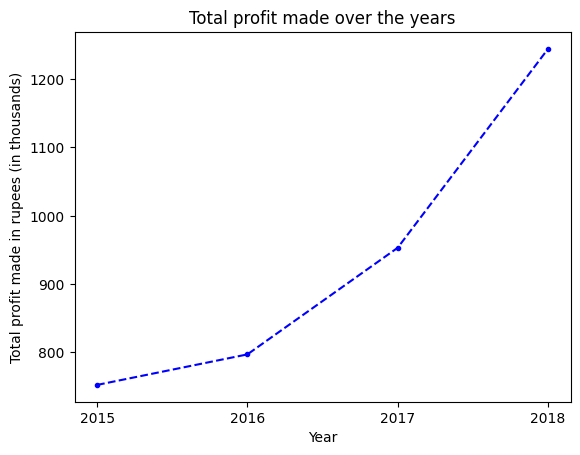

In [84]:
# Visualisation of total profit made over the years
years = sorted(df["Year"].unique())
values = []
for i in years:
    values.append((df.loc[df["Year"] == i].Profit.sum())/1000)
plt.plot(years,values,"b.--")
plt.title("Total profit made over the years")
plt.xlabel("Year")
plt.xticks([2015,2016,2017,2018])
plt.ylabel("Total profit made in rupees (in thousands)")
plt.show()

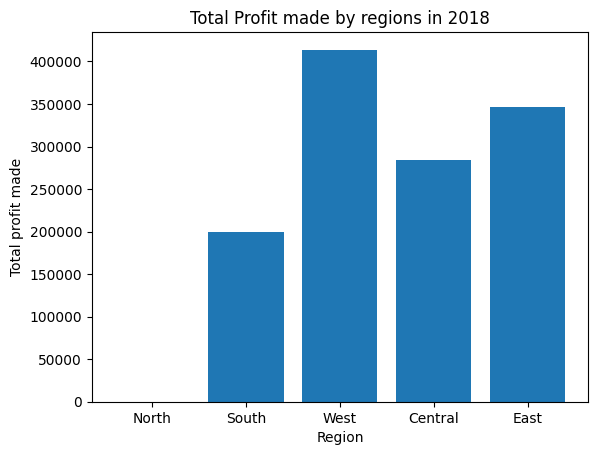

In [92]:
# Visualisation of total profit made by regions in 2018
list = df["Region"].unique()
values = []
for i in list:
    values.append(df.loc[(df["Year"] == 2018) & (df["Region"] == i)].Profit.sum())
plt.bar(list,values)
plt.title("Total Profit made by regions in 2018")
plt.xlabel("Region")
plt.ylabel("Total profit made")
plt.show()

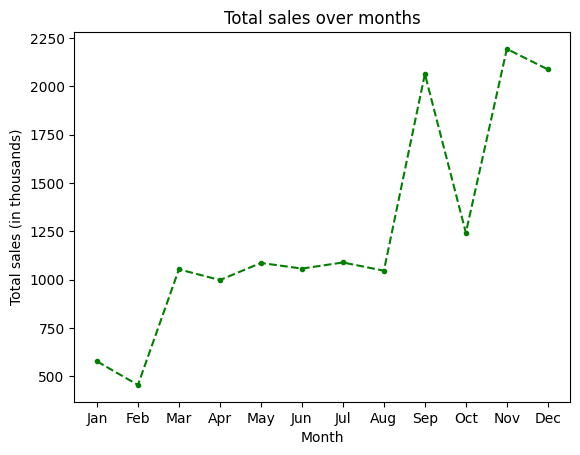

In [107]:
# Total sales generated every month
list = sorted(df["Month"].unique())
label = ["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"]
values = []
for i in list:
    values.append((df.loc[df["Month"] == i].Sales.sum())/1000)

plt.plot(label, values,"g.--")
plt.title("Total sales over months")
plt.xlabel("Month")
plt.ylabel("Total sales (in thousands)")
plt.show()

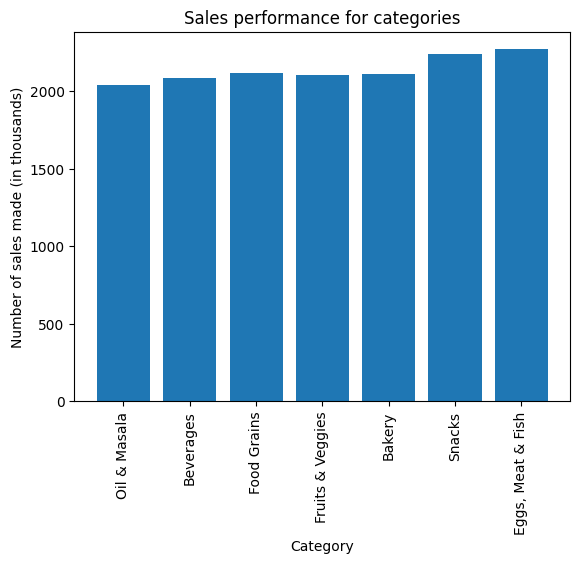

In [74]:
# Visualisation of sales performance for all categories
labels = df["Category"].unique()
values = []

for i in labels:
    values.append((df.loc[df["Category"] == i].Sales.sum())/1000)
plt.bar(labels, values)
plt.title("Sales performance for categories")
plt.xlabel("Category")
plt.ylabel("Number of sales made (in thousands)")
plt.xticks(rotation = 90)
plt.show()

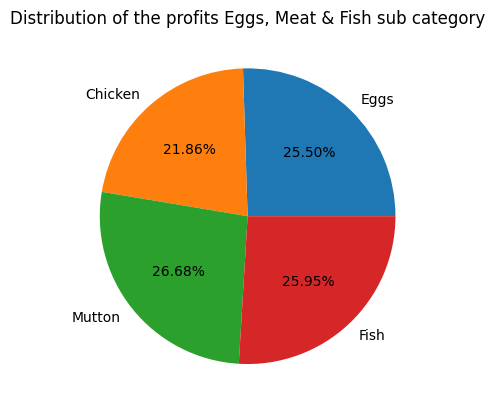

In [81]:
# Visualisation of the profit distribution sub products of the top performing Category
list = df.loc[df["Category"] == "Eggs, Meat & Fish"]["Sub Category"].unique()
values = []
for i in list:
    values.append(df.loc[df["Sub Category"] == i].Profit.sum())
plt.pie(values, labels = list, autopct="%.2f%%")
plt.title("Distribution of the profits Eggs, Meat & Fish sub category")
plt.show()